Итоговое задание Баукина Ивана

по Проекту 3. О вкусной и здоровой пище (SF-DST-28)

Юнит 3. Введение в машинное обучение (отредактирован 23.11.2020)

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import re
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from collections import Counter

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
34627,id_658,Munich,NaN,665.0,NaN,17.0,"[['Best coffee in town', 'Delicious coffee mad...",/Restaurant_Review-g187309-d6977036-Reviews-Em...,d6977036,1,5.0
15801,id_9000,Paris,"['French', 'Fast Food', 'Street Food']",9002.0,$,2.0,"[[], []]",/Restaurant_Review-g187147-d12351123-Reviews-B...,d12351123,1,4.5
21064,id_27,Helsinki,"['Italian', 'Pizza', 'European', 'Vegetarian F...",28.0,$$ - $$$,149.0,"[['Fabulous Pizza ""Straight outta Naples""', 'G...",/Restaurant_Review-g189934-d12439871-Reviews-P...,d12439871,1,4.0
17992,id_3642,Berlin,NaN,3644.0,NaN,13.0,"[['Ice Cream Supreme'], ['08/29/2016']]",/Restaurant_Review-g187323-d7189037-Reviews-Ei...,d7189037,1,4.5
37017,id_13899,London,"['Bar', 'British', 'Pub']",13909.0,$$ - $$$,44.0,"[['A snack and rest', ""Whatever you do don't e...",/Restaurant_Review-g186338-d3844902-Reviews-Sh...,d3844902,1,3.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [15]:
#Используемые в ходе работы функции

    #Функция - быстрая сводка статистических данных по признаку.
    def show_statistics(df_analyze):
        flag = 0;
        stat_data = []
        IQR = df_analyze.quantile(0.75,interpolation = 'midpoint') - df_analyze.quantile(0.25,interpolation = 'midpoint')
        perc25 = df_analyze.quantile(0.25)
        perc75 = df_analyze.quantile(0.75)
        min_range = df_analyze.quantile(0.25,interpolation = 'midpoint') - 1.5*IQR
        max_range = df_analyze.quantile(0.75,interpolation = 'midpoint') + 1.5*IQR
        for i in df_analyze:
            if (i < min_range)or(i > max_range):
                flag+=1
        if (flag > 0 ):
            print('Имеются выбросы в кол-ве: ', flag)
        else:
            print('Выбросов нет!')
        mean_df = df_analyze.mean()
        median_df = df_analyze.median()
        std_df = df_analyze.std()
        sweep = df_analyze.max() - df_analyze.min()
        #Добавляем найденные данные в список статистических данных (тааавталогия))
        stat_data.append(mean_df)
        stat_data.append(median_df)
        stat_data.append(std_df)
        stat_data.append(IQR)
        stat_data.append(sweep)
        stat_data.append(perc25)
        stat_data.append(perc75)
        print('Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): '
            '\n Среднее[0]:',round(mean_df,7), '\n Медиана[1]:',median_df, '\n СКО[2]:',round(std_df,7)
              ,'\n Межквартильный размах-IQR[3]',IQR,'\n Размах[4]',sweep, '\n 25% перцентиль[5]:',perc25
              ,'\n 75% перцентиль[6]:',perc75,"\n Границы выбросов: [{f}, {l}].".format(f = min_range, l = max_range))
        return stat_data

    #Функция первичного осмоттра столбцов
    def columns_info(col_value):
        if data[col_value].dtype == object:
            indexes = list(data[col_value].value_counts().index)
            print(data[col_value].value_counts())
            print('Уникальных значений:',data[col_value].nunique())
            print('Пропущенных значений в столбце:',data[col_value].isnull().sum(axis = 0))
        else:
            fig,ax = plt.subplots()
            data[col_value].hist(ax=ax)
            data[col_value].describe
            ax.set_xlabel(col_value)
            plt.show
            show_statistics(data[col_value])
            print('Пропущенных значений в столбце:',data[col_value].isnull().sum(axis = 0))

#############################Для признака City############################
    
    
    # #Функция проверяет в столице ли находится ресторан
    not_capital = ['Barcelona','Milan','Hamburg','Munich','Lyon','Zurich','Oporto',
              'Geneva','Krakow']
    def is_capital(city):
        if city in not_capital:
            x = 0
        else:
            x = 1
        return x
    
    #Функция выбирает города входящие в 5-ку наиболее гостепреимных стран
    most_hospitable = ['Dublin','Lisbon','Oporto','Edinburgh','Athens','Madrid','Barcelona',
                  'Milan']
    def is_most_hospitable(city):
        if city in most_hospitable:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города лидирующие в списке стран по количеству кафе,ресторанов
    #и баров на человека
    most_cafe_density = ['Madrid','Milan','Barcelona','Rome','Brussel','Amsterdam','Berlin',
                  'London']
    def is_cafe_density(city):
        if city in most_cafe_density:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города лидирующие в списке стран по уровню жизни
    best_level_of_living = ['Copenhagen','Zurich','Geneva','Helsinki','Amsterdam',
                  'Vienna']
    def is_level_of_living(city):
        if city in best_level_of_living:
            x = 1
        else:
            x = 0
        return x

    #Функция проверяет является ли город одним из наиболее часто посещаемых в Европе
    most_visited = ['Barcelona','Milan','Prague','Amsterdam','Paris','Rome','London']
    def is_most_visited(city):
        if city in most_visited:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает наиболее красивые города европы
    most_beatiful = ['Prague','Barcelona','Budapest','Amsterdam','Rome',
                  'Paris']
    def is_most_beatiful(city):
        if city in most_beatiful:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города входящие в Clobal Power City Index 2008-2017
    GPCI = ['London','Paris']
    def is_GPCI(city):
        if city in GPCI:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, считающиеся наиболее безопасными
    most_saved = ['Munich','Zurich']
    def is_most_saved(city):
        if city in most_saved:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, считающиеся наиболее дорогими для жизни
    most_expensive = ['Edinburgh','Vienna', 'Zurich','Copenhagen','Amsterdam']
    def is_most_expensive(city):
        if city in most_expensive:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, считающиеся лучшими для обучения
    #иностранных студентов
    most_educateable = ['Paris','Berlin', 'London','Munich']
    def is_most_educateable(city):
        if city in most_educateable:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, близкие к морю или заливу
    near_sea = ['Barcelona','Rome', 'Lisbon','Amsterdam', 'Stockholm', 'Dublin',
               'Copenhagen', 'Athens', 'Edinburgh', 'Oporto', 'Oslo', 'Helsinki']
    def is_near_sea(city):
        if city in near_sea:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, близкие к горам
    near_rock = ['Barcelona','Vienna', 'Zurich','Geneva',]
    def is_near_rock(city):
        if city in near_rock:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города,c плотностью населения больше 7 млн./км^2
    most_populated_city_per_km2 = ['Barcelona','Paris', 'Lyon','Athens','Milan']
    def is_most_populated_city_per_km2(city):
        if city in most_populated_city_per_km2:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города,с наиболее теплым климатом
    most_hot_cities = ['Barcelona','Madrid', 'Rome','Athens','Milan',
                                  'Lisbon', 'Oporto']
    def is_most_hot_cities(city):
        if city in most_hot_cities:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает наиболее дождливые города Европы
    most_rainy_cities = ['Amsterdam','Brussels', 'Copenhagen','Ljubljana']
    def is_most_rainy_cities(city):
        if city in most_rainy_cities:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города Европы с наилучшей экологией
    most_ecology_cities = ['Oslo','Helsinki', 'Copenhagen','London','Amsterdam']
    def is_most_ecology_cities(city):
        if city in most_ecology_cities:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города из стран где английский язык - официальный
    english_official = ['Dublin','London']
    def is_english_official(city):
        if city in english_official:
            x = 1
        else:
            x = 0
        return x
    
    #Города входящие в топ-10  Европы по количеству населения
    most_poopulated = ['London','Berlin','Madrid','Rome','Paris']
    def is_populated(city):
        if city in most_poopulated:
            x = 0
        else:
            x = 1
        return x
    
    #Функция выбирает города наиболее привлекательные для молодежи
    better_for_young = ['Amsterdam','Rome','Budapesht',
                          'Brussel', 'Paris']
    def is_better_for_young(city):
        if city in better_for_young:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города со средним возрастом населения менее 40 лет на 2018 год
    mid_young = ['Luxembourg','Oslo']
    def is_mid_young(city):
        if city in mid_young:
            x = 1
        else:
            x = 0
        return x
    
    
#############################Для признака Reviews############################    
   
    
    #Функция проверяет наличие хорошей кухни в ресторане
    good_cousine = ['good','delicious', 'nice', 'best', 'amazing', 'excellent', 'great',\
            'lovely', 'healthy', 'brilliant', 'fantastic', 'tasty', 'fresh',\
            'incredible', 'fabulous', 'perfect', 'cool', 'awesome', 'super', \
            'wonderful', 'yummy','unique','wonderful','fine','best','top','favorite']
    
    bad_cousine = ['worth','bad', 'poor', 'terrible', 'slow', 'worst','disappointing', 'overpriced', 'awful',\
            'rude','horrible', 'too']
    def check_is_good_cousine(reviews):
        x_1 = 0
        x_2 = 0
        x_3 = 0
        two_good = 0
        one_good = 0
        no_good = 0
        if len(reviews) > 0:
            words_1 = reviews[0][1:-1].split(' ')
        else:
            words_1 = ''
        if len(reviews) > 1:
            words_2 = reviews[1][1:-1].split(' ')
        else: 
            words_2 = ''
        for word in words_1:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in good_cousine:
                x_1 = 1
            if word.lower() in bad_cousine:
                x_3 = 1
        for word in words_2:
            word = re.sub("[^A-Za-z]", "", word)
            #print(word)
            if word.lower() in good_cousine:
                x_2 = 1
            if word.lower() in bad_cousine:
                x_3 = 1
        if (x_1>0)and(x_2>0):
            two_good = 1
        elif(x_1>0)or(x_2>0):
            one_good = 1
        elif(x_3>0):
            no_good = 1
        return [no_good,one_good,two_good]
    
    #Функция проверяет наличие хорошей атмосферы в ресторане
    good_atmosphere = [ 'awesome', 'cosy', 'beatiful', 'charming', 'cute', 'authentic',
                      'comfortable','wi-fi']
    def check_is_good_atmosphere(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in good_atmosphere:
                    x =1
        return x
    
    #Функция проверяет является ли он приотельным
    is_hotel = ['hotel', 'motel', 'room', 'inn','guesthouse','accommodation'
               ,'sanatorium','spa','stay','residential']
    def check_is_hotel(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in is_hotel:
                    x =1
        return x
    
    #Функция проверяет есть ли возможность взять еду на вынос
    take_away = ['take', 'away', 'go','out','outside','takeaway']
    def check_is_take_away(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in take_away:
                    x =1
        return x

    
    #Функция проверяет имеются ли стандартные предложения
    have_standard = ['breakfast', 'lunch', 'dinner','supper', 'coffee','tea']
    def check_is_have_standard(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in have_standard:
                    x =1
        return x

    #Функция проверяет быстроту приготовления пищи
    is_fast = ['fast','quick']
    def check_is_fast(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in is_fast:
                    x =1
        return x

    with_kids = ['kid', 'kids', 'son','daughter', 'children','child',
                'sons','daughters','birthday', 'party']
    #Функция проверяет наличие в отзывах записей о детях
    def check_is_with_kids(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in with_kids:
                    x =1
        return x

    #Функция проверяет наличие музыки
    has_music = ['music']
    def check_has_music(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in has_music:
                    x =1
        return x

    #Функция проверяет наличие вида
    has_view = ['view','views']
    def check_has_view(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in has_view:
                    x =1
        return x
    
    
    
#############################Для признака Cousine Style############################
    
    
    
    drinks = ['coffee','cafe','tea']
    #Функция проверяет имеются ли кофе или чай
    def have_drinks(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in drinks:
                x = 1
        return x
    
    #Функция проверят ресторан на наличие вегатарианского меню
    def have_vegan(cuisine_list):
        all_cuisine = ''
        for cousine in list(cuisine_list):
            all_cuisine+=cousine
        if  "'Vegetarian Friendly'" in all_cuisine or 'Vegan Options' in all_cuisine:
            x = 1
        else:
            x = 0
        return x    
    
    is_fastfood = ['fastfood','streetfood']
    #Функция проверяет имеется ли Fusion кухня
    def have_fastfood(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in is_fastfood:
                x = 1
        return x

    #Функция проверяет имеется безглютеновая еда
    is_grill = ['grill','barbecue','steakhouse']
    def have_grill(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in is_grill:
                x = 1
        return x

    #Функция проверяет наличие алкоголя в меню
    have_wine = ['wine','bar','pub', 'winebar']
    def have_wine_bar(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in have_wine:
                x = 1
        return x

    have_asian = ['japanese','sushi','asian','korean','thai', 'chinese', 'vietnamese']
    #Функция проверяет имеется ли азиатска кухня
    def have_asian_cousine(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in have_asian:
                x = 1
        return x
    

    #Функция заменяет элементы в колонке Price Range
    def get_dimmies_price(x):
        cheap = 0
        middle = 0
        expensive = 0
        if (str(x) == '$$ - $$$')or(pd.isnull(str(x))):
            cheap = 0
            middle = 1
            expensive = 0
        if (str(x) == '$'):
            cheap = 1
            middle =0
            expensive = 0
        if (str(x) == '$$$$'):
            cheap = 0
            middle = 0
            expensive = 1 
        return [cheap,middle,expensive]
    
    #Функция заменяет элементы в колонке Price Range $ - 1,$$ - $$$ - 2, $$$$ - 3
    def get_dimmies_price_kat(x):
            if (str(x) == '$$ - $$$'):
                x = 2
            if (str(x) == '$'):
                x = 1
            if (str(x) == '$$$$'):
                x = 3
            if (pd.isnull(str(x))):
                x = 2
            return x

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

Имеются выбросы в кол-ве:  5428
Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): 
 Среднее[0]: 124.4711966 
 Медиана[1]: 33.0 
 СКО[2]: 294.1143451 
 Межквартильный размах-IQR[3] 106.0 
 Размах[4] 9658.0 
 25% перцентиль[5]: 9.0 
 75% перцентиль[6]: 115.0 
 Границы выбросов: [-150.0, 274.0].
Пропущенных значений в столбце: 3200


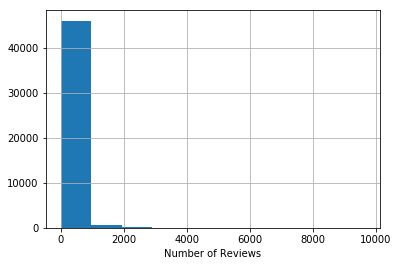

In [16]:
#Рассмотрим признак - Number of Reviews
columns_info('Number of Reviews')

In [17]:
#Имеются пропуски (3200) и выбросы
#Выбросы удалять не будем, так как количество "реальных" отзывов может быть ограничено лишь
#количеством посетивших рестораны людей, о котором у нас нет данных
#Так как медиана и мода меньше среднего - распределение положительное, заменю пропуски медианой, предварительно создав 
#признак NAN_Number_of_Reviews_is
data['NAN_Number_of_Reviews'] = pd.isna(data['Number of Reviews']).astype('uint8')
median_Numb_Reviews = data['Number of Reviews'].median()
data['Number of Reviews'].fillna(median_Numb_Reviews, inplace=True)

In [18]:
#Рассмотрим признак - Cuisine Style
columns_info('Cuisine Style')

['Italian']                                                                   1332
['French']                                                                    1019
['Spanish']                                                                    860
['French', 'European']                                                         503
['Cafe']                                                                       500
                                                                              ... 
['Seafood', 'Steakhouse', 'Vegetarian Friendly', 'Vegan Options', 'Halal']       1
['Italian', 'Turkish', 'Vegetarian Friendly']                                    1
['Portuguese', 'European', 'Wine Bar']                                           1
['Middle Eastern', 'Moroccan', 'Arabic', 'Mediterranean', 'Halal']               1
['Italian', 'Healthy', 'Vegan Options', 'Vegetarian Friendly']                   1
Name: Cuisine Style, Length: 10731, dtype: int64
Уникальных значений: 10731
Пропущенных

In [19]:
#Имеются пропуски в кол-ве: 11590
#Заполню пропуски значением other_style, предварительно создав признак -
#NAN_Cuisine Style
# Рассмотрим признак - вид кухни
data['NAN_Cuisine Style'] = pd.isna(data['Cuisine Style']).astype('float64') 
# заполним пропуски значением 'Other_style'
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Other_style']")

In [20]:
#Рассмотрим признак - Cuisine Style
columns_info('Price Range')

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64
Уникальных значений: 3
Пропущенных значений в столбце: 17361


In [21]:
#Заполним пропуски для Price Range, предварительно сохранив информацию о них
#в NAN_Price Range
# Создам новый признак - пропуски в ценах
data['NAN_Price Range'] = pd.isna(data['Price Range']).astype('float64') 
#Заменю все пропущенные значения наиболее часто встречающимся - модой
data['Price Range'].fillna('$$ - $$$', inplace=True)

In [22]:
#Рассмотрим признак - Reviews
columns_info('Reviews')

[[], []]                                                                                                                              8112
[['Whenever in Madrid, we never miss this gem...', 'Underrated sushi restaurant with very good...'], ['04/11/2017', '12/02/2016']]       2
[['Excellent cuisine, friendly and helpful se...', 'Not tasty'], ['12/25/2016', '06/05/2016']]                                           2
[['Delicious'], ['06/06/2017']]                                                                                                          2
[['Very good all around', 'Our first Madrid restaurant'], ['11/20/2017', '10/11/2017']]                                                  2
                                                                                                                                      ... 
[['Really Great Risotto!!', 'Poor service, poor food'], ['10/01/2017', '04/10/2017']]                                                    1
[['Excellent Northern Europ

In [23]:
#Создадим признак пропуски в отзывах:
data['NAN_Reviews'] = (data['Reviews']=='[[], []]').astype('float64')

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [24]:
data.nunique(dropna=False)

Restaurant_id            13094
City                        31
Cuisine Style            10732
Ranking                  12975
Price Range                  3
Number of Reviews         1573
Reviews                  41858
URL_TA                   49963
ID_TA                    49963
sample                       2
Rating                      10
NAN_Number_of_Reviews        2
NAN_Cuisine Style            2
NAN_Price Range              2
NAN_Reviews                  2
dtype: int64

### Cousine Style

In [25]:
#Закодируем значения признака Cousine Style
le = LabelEncoder()
le.fit(data['Cuisine Style'])
data['code_Cuisine Style'] = le.transform(data['Cuisine Style'])

# проведем обработку значений переменной
data['Cuisine Style'] = data['Cuisine Style'].str.findall(r"'(\b.*?\b)'") 

temp_list = data['Cuisine Style'].tolist()

def list_unrar(list_of_lists):
    result=[]
    for lst in list_of_lists:
        result.extend(lst)
    return result

temp_counter=Counter(list_unrar(temp_list))
#Сделаем get_dummies для кухонь
for cuisine in temp_counter:
    data[cuisine] = data['Cuisine Style'].apply(lambda x: 1 if cuisine in x else 0 ).astype('float64')

### City

In [26]:
#Так как для Feature Engineering используется признак City
#то get_dummies для него проведем в последнюю очередь
#df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)

### Price Range

In [27]:
#Функция заменяет элементы в колонке Price Range $ - 1, $$ - $$$ - 2, $$$$ - 3
#Но прежде сохраню сам параметр, он потребуется для Feature Engineering
#Создам новые признаки по стоимости обслуживания:
data['PricePrice_Range_processed'] = data['Price Range'].apply(get_dimmies_price_kat)


In [28]:
df_train.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample
6913,id_704,Rome,"['Italian', 'Mediterranean', 'European', 'Wine...",705.0,4.5,$$ - $$$,127.0,"[['Beautiful wine', 'In my top ten, wine lover...",/Restaurant_Review-g187791-d11905346-Reviews-A...,d11905346,1
18611,id_4267,Paris,"['French', 'European', 'Vegetarian Friendly']",4268.0,3.5,$$ - $$$,353.0,"[['Sunday brunch', 'Great Atypical Brunch Expe...",/Restaurant_Review-g187147-d7306133-Reviews-La...,d7306133,1
6461,id_3999,Rome,"['Italian', 'Pizza']",4000.0,3.5,$$ - $$$,86.0,[['Worth a visit if your in the Talenti area']...,/Restaurant_Review-g187791-d6905021-Reviews-Al...,d6905021,1
22176,id_2583,London,"['European', 'British', 'Vegetarian Friendly',...",2588.0,4.0,$$ - $$$,215.0,"[['Great food at a reasonable price.', 'Deserv...",/Restaurant_Review-g186338-d1389760-Reviews-Ro...,d1389760,1
20728,id_1432,Milan,['Italian'],1434.0,4.0,$$ - $$$,102.0,"[['Beautiful service, amazing food.', 'Nice Co...",/Restaurant_Review-g187849-d2561330-Reviews-Sa...,d2561330,1


### ID_TA

In [29]:
#Оставим только числовой код, удалив буквы    
data['code_ID_TA'] = data['ID_TA'].apply(lambda x: float(x[1:]))
    

### URL_TA

In [30]:
#Также оставим только числовой код, удалив все остальное
data['code_after_g_URL_TA'] = data['URL_TA'].str.split('-').apply(lambda x: x[1][1:]).astype('float64')

# EDA и Feature Engineering

### Посмотрим распределение признака

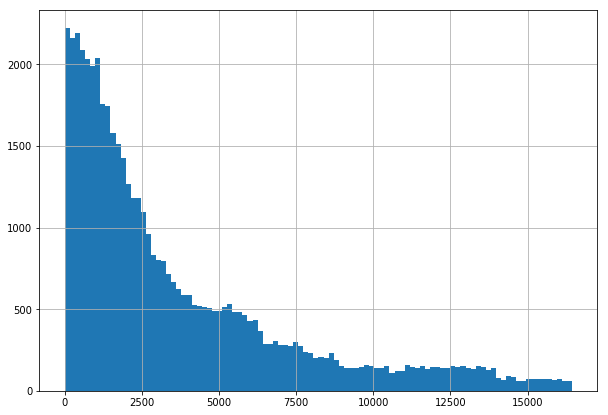

In [31]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

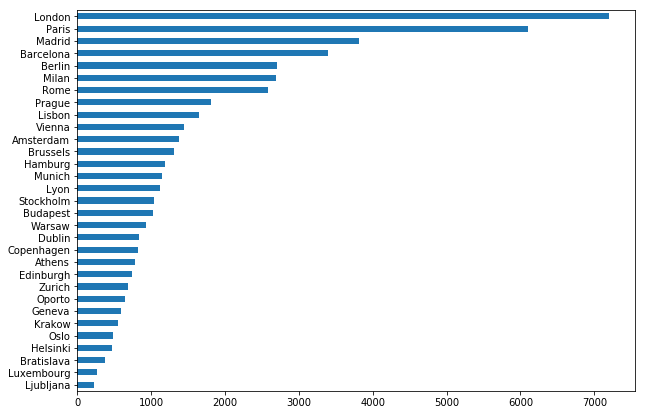

In [32]:
data['City'].value_counts(ascending=True).plot(kind='barh')

## Углубимся в исследование признака City
### Созданим новые признаки на основе данных извне

In [33]:
data['Is_Capital'] = data['City'].apply(is_capital)
data['Most_poopulated_country'] = data['City'].apply(is_populated)
data['Most_hospitable_country'] = data['City'].apply(is_most_hospitable)
data['Most_cafe_density_city'] = data['City'].apply(is_cafe_density)
data['Best_level_of_living_country'] = data['City'].apply(is_level_of_living)
data['Most_educateable_cities'] = data['City'].apply(is_most_educateable)
data['Most_expensive_cities'] = data['City'].apply(is_most_expensive)
data['Most_saved_cities'] = data['City'].apply(is_most_saved)
data['In_GPCI_country'] = data['City'].apply(is_GPCI)
data['Most_beatiful_cities'] = data['City'].apply(is_most_beatiful)
data['Near_sea_cities'] = data['City'].apply(is_near_sea)
data['Near_rock_cities'] = data['City'].apply(is_near_rock)
data['Most_populated_city_per_km2'] = data['City'].apply(is_most_populated_city_per_km2)
data['Most_hot_cities'] = data['City'].apply(is_most_hot_cities)
data['Most_rainy_cities'] = data['City'].apply(is_most_rainy_cities)
data['Most_ecology_cities'] = data['City'].apply(is_most_ecology_cities)
data['English_official'] = data['City'].apply(is_english_official)
data['Most_visited_city'] = data['City'].apply(is_most_visited)

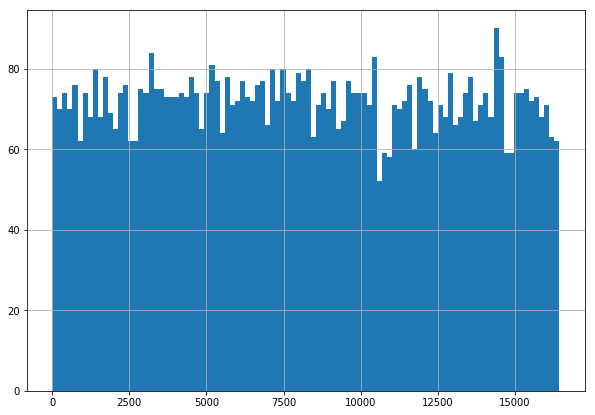

In [34]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

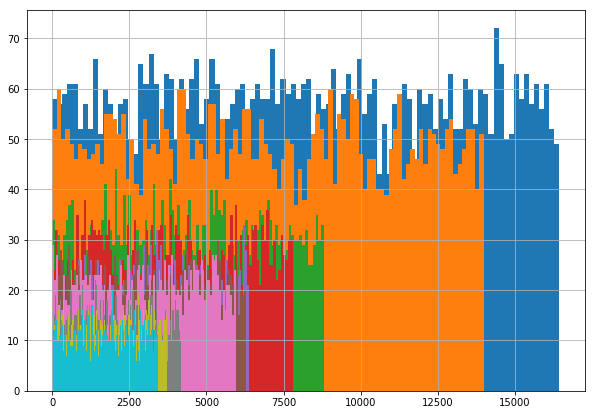

In [35]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.
Следовательно, необходимо отнормировать критерий Ranking по городам City

In [36]:
#Создадим новые признаки - средний рейтинг ресторанов в городе
#и количество ресторанов в городе
mean_Ranking_on_City = data.groupby(['City'])['Ranking'].mean()
count_Restorant_in_City = data['City'].value_counts(ascending=False)
data['mean_Ranking_in_City'] = data['City'].apply(lambda x: mean_Ranking_on_City[x])
data['count_Restorant_in_City'] = data['City'].apply(lambda x: count_Restorant_in_City[x])
#А также - рестораны, входящие в топ 500 лучших по рейтингу
data['Most_ranking'] = data.Ranking.apply(lambda x: 1 if x < 500 else 0)

In [37]:
#Нормируем значения
data['norm_Ranking_on_Rest_in_City'] = (data['Ranking'] - data['mean_Ranking_in_City']) / data['count_Restorant_in_City']


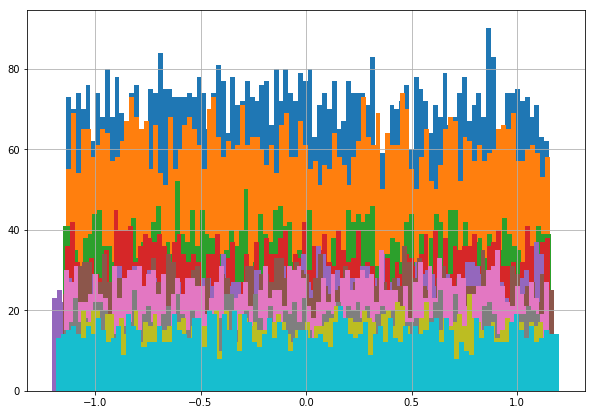

In [38]:
# Теперь посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['norm_Ranking_on_Rest_in_City'][data['City'] == x].hist(bins=100)
plt.show()

In [39]:
#Отнормируем рейтинг отностительно максимального в городе
max_Ranking_on_City = data.groupby(['City'])['Ranking'].max()
data['max_Ranking_on_City'] = data['City'].apply(lambda x: max_Ranking_on_City[x])
data['norm_Ranking_on_maxRank_in_City'] = (data['Ranking'] - data['mean_Ranking_in_City']) / data['max_Ranking_on_City']

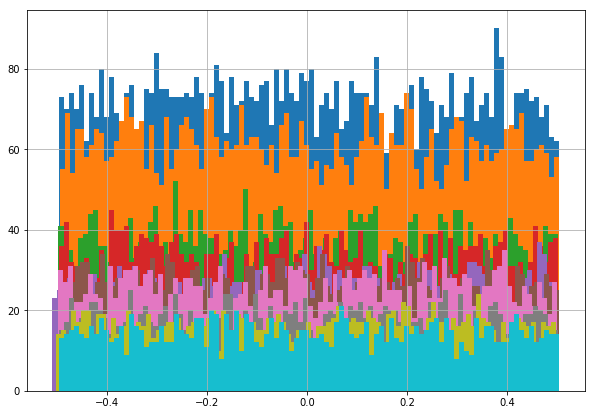

In [40]:
# И снова посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['norm_Ranking_on_maxRank_in_City'][data['City'] == x].hist(bins=100)
plt.show()

### Посмотрим распределение целевой переменной

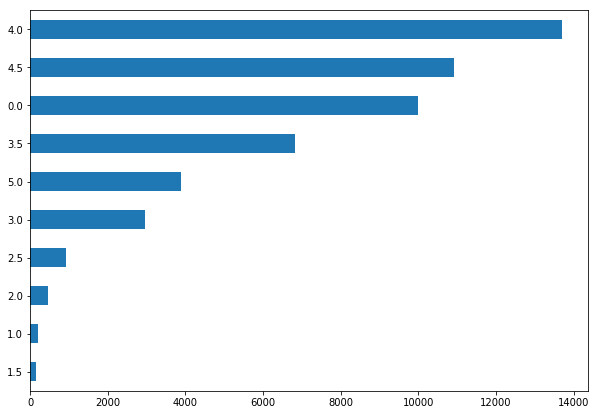

In [41]:
data['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

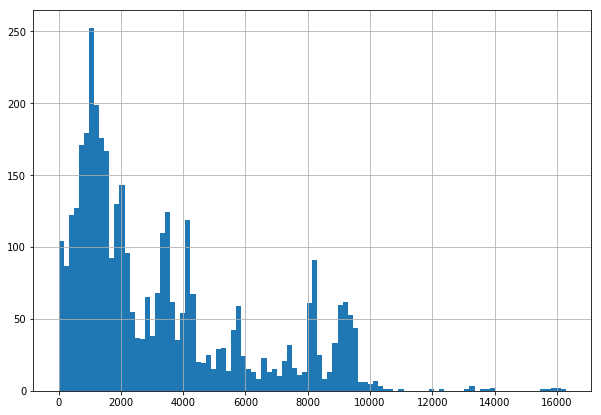

In [42]:
data['Ranking'][data['Rating'] == 5].hist(bins=100)

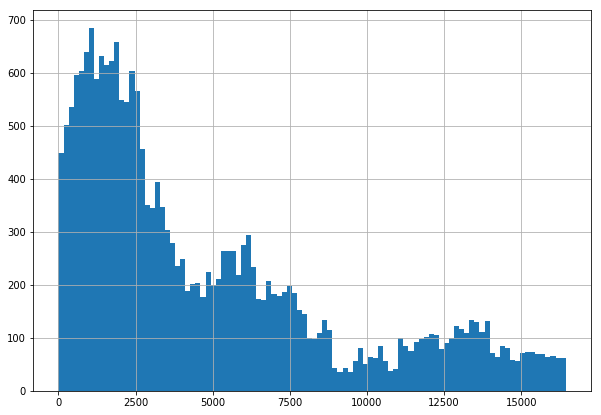

In [43]:
data['Ranking'][data['Rating'] < 4].hist(bins=100)

## Углубимся в анализ признака Reviews

In [44]:
#Посмотрим на отзывы
data['Reviews']

0                                                 [[], []]
1        [['Very good reviews!', 'Fine dining in Hakani...
2        [['Better than the Links', 'Ivy Black'], ['12/...
3        [['Most exquisite', 'Delicious and authentic']...
4        [['Always the best in bratislava', 'Very good ...
                               ...                        
49995    [['The real Italian experience!', 'Wonderful f...
49996    [['Parisian atmosphere', 'Bit pricey but inter...
49997    [['Good by swedish standards', 'A hidden jewel...
49998    [['Underground restaurant', 'Oldest Restaurant...
49999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: Reviews, Length: 50000, dtype: object

In [45]:
#Вытащим даты
data['rew_dates'] = data.Reviews.apply(lambda x: [0] if
                                            pd.isna(x) else x[2:-2].split('], [')[1][1:-1].split(","))
data['rew_dates']

0                                 []
1        [12/05/2017',  '10/29/2017]
2        [12/28/2017',  '12/06/2017]
3        [12/06/2017',  '11/22/2017]
4        [02/08/2018',  '01/24/2018]
                    ...             
49995    [12/16/2017',  '11/12/2017]
49996    [12/21/2017',  '12/12/2017]
49997    [11/03/2016',  '04/12/2008]
49998    [07/11/2017',  '06/18/2017]
49999    [01/31/2016',  '07/04/2012]
Name: rew_dates, Length: 50000, dtype: object

### Анализируем и создаем новые признаки

In [46]:

#Наиболее свежие отзывы
data['last_rew'] = pd.to_datetime(data['rew_dates'].apply(lambda x: max(x)))
#Добавим новые признаки - даты первого и второго отзывов
data['first_rew'] = pd.to_datetime(data['rew_dates'].apply(lambda x: x[0]))
data['second_rew'] = pd.to_datetime(data['rew_dates'].apply(lambda x: x[1] if len(x) == 2 else ''))
#Теперь найдем разницу в днях между представленными отзывами
data['rew_delta'] = np.abs(data['first_rew']-data['second_rew'])
data['Days_btwn_rew'] = data['rew_delta'].apply(lambda x: x.days)
#Так как медиана и мода меньше среднего, то распределение признака положительное
#Следовательно заменим пропуски медианным значением
median_rew_delta = data['Days_btwn_rew'].median()
data['Days_btwn_rew'] = data['Days_btwn_rew'].fillna(median_rew_delta, inplace = True)
#Добавим признак - актуальность отзыва (год последнего отзыва из представленных для каждого ресторана)
data['Last_rew_year'] = data['last_rew'].apply(lambda x: x.year)
#columns_info('Last_rew_year')
#Так как медиана и мода меньше среднего, то распределение признака положительное
#Имеются выбросы
#Следовательно заменим пропуски медианным значением
med_Last_rew_year = data['Last_rew_year'].median()
data['Last_rew_year'] = data['Last_rew_year'].fillna(med_Last_rew_year, inplace = True)
#Добавим новый признак - "совместная важность" отзывов. Если между отзывами
#прошло больше 1.5 месяца они могут не отражать действительную картину
need_days = timedelta(days=45)
data['Important_reviews'] = data['rew_delta'].apply(lambda x: 1 if x<need_days else 0)
data['Important_reviews'].value_counts()

0    35473
1    14527
Name: Important_reviews, dtype: int64

### Разберемся непосредственно с самими отывами и попробуем найти в них "keys - слова"

In [47]:
data['Review'] = data.Reviews.apply(lambda x: [0] if pd.isna(x) else x[2:-2].split('], [')[0])
#Создадим признак - список из представленных отзывов
data['Review'] = data['Review'].apply(lambda x: str(x).split(','))


In [48]:
data['Is_hotel'] = data['Review'].apply(check_is_hotel) 
data['Take_Away'] = data['Review'].apply(check_is_take_away) 
data['Eat_time'] = data['Review'].apply(check_is_have_standard) 
data['With_kids'] = data['Review'].apply(check_is_with_kids)
data['Good_atmosphere'] = data['Review'].apply(check_is_good_atmosphere)
data['Is_fast'] = data['Review'].apply(check_is_fast)
data['Has_music'] = data['Review'].apply(check_has_music)
data['Has_view'] = data['Review'].apply(check_has_view)
data['Have_wine'] = data['Cuisine Style'].apply(have_wine_bar)
data['Have_Asian'] = data['Cuisine Style'].apply(have_asian_cousine)
data['Have_drinks'] = data['Cuisine Style'].apply(have_drinks)
data['Have_fastfood'] = data['Cuisine Style'].apply(have_fastfood)
data['Have_Grill'] = data['Cuisine Style'].apply(have_grill)

In [49]:
#Если в отзывах встречаются слова их списка, то скорее всего отзыв положительный
data['Review'] = data['Review'].apply(check_is_good_cousine)
#Создадим новые признаки:
#оба отзывы скорее всего отрицательные
data['Bad_review'] = data['Review'].apply(lambda x: x[0])
#один из отзывов положительный
data['One_good_rew'] = data['Review'].apply(lambda x: x[1])
#оба отзыва положительные
data['Both_good_rew'] = data['Review'].apply(lambda x: x[2])
data['Both_good_rew'].value_counts()

0    39541
1    10459
Name: Both_good_rew, dtype: int64

## Углубимся в анализ признака - Cousine Style

In [50]:
data['Cuisine Style']

0                                               [Bar, Pub]
1        [European, Scandinavian, Gluten Free Options, ...
2                                    [Vegetarian Friendly]
3        [Italian, Mediterranean, European, Vegetarian ...
4        [Italian, Mediterranean, European, Seafood, Ve...
                               ...                        
49995    [Italian, Vegetarian Friendly, Vegan Options, ...
49996    [French, American, Bar, European, Vegetarian F...
49997                                    [Japanese, Sushi]
49998    [Polish, European, Eastern European, Central E...
49999                                            [Spanish]
Name: Cuisine Style, Length: 50000, dtype: object

In [51]:
# сформируем список достаточно уникальных кухонь и сформируем на его основе новый признак
list_of_unique_Cuisine = [x[0] for x in temp_counter.most_common()[-16:]]
data['unique_Cuisine_Style'] = data['Cuisine Style'].apply(lambda x: 1 if len(set(x) & set(list_of_unique_Cuisine))>0  else 0).astype('float64')
#Добавим новый признак - количество кухонь для каждого ресторана
data['Сousine_Сounts'] = data['Cuisine Style'].apply(lambda x: len(x))
#А также признак наличия вегатарианского меню
data['Have_Vegan_Cousine'] = data['Cuisine Style'].apply(have_vegan)
    

### Добавим новые признаки на основе поиска по ключевым словам

In [52]:
data['Have_wine'] = data['Cuisine Style'].apply(have_wine_bar)
data['Have_Asian'] = data['Cuisine Style'].apply(have_asian_cousine)
data['Have_drinks'] = data['Cuisine Style'].apply(have_drinks)
data['Have_fastfood'] = data['Cuisine Style'].apply(have_fastfood)
data['Have_Grill'] = data['Cuisine Style'].apply(have_grill)

## Создам новые признаки по стоимости обслуживания (Price Range):
### дешево, средняя цена и дорого

In [53]:
data['Price Range'] = data['Price Range'].apply(get_dimmies_price)
data['cheap'] = data['Price Range'].apply(lambda x: x[0])
data['middle'] = data['Price Range'].apply(lambda x: x[1])
data['expensive'] = data['Price Range'].apply(lambda x: x[2])

## Теперь можно использовать функцию get_dummies для признака City

In [54]:
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [55]:
data.head(5)


,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"[Bar, Pub]",12963.0,"[0, 1, 0]",4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"[European, Scandinavian, Gluten Free Options, ...",106.0,"[0, 1, 0]",97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,[Vegetarian Friendly],810.0,"[0, 1, 0]",28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,"[0, 0, 1]",202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,"[0, 0, 1]",162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

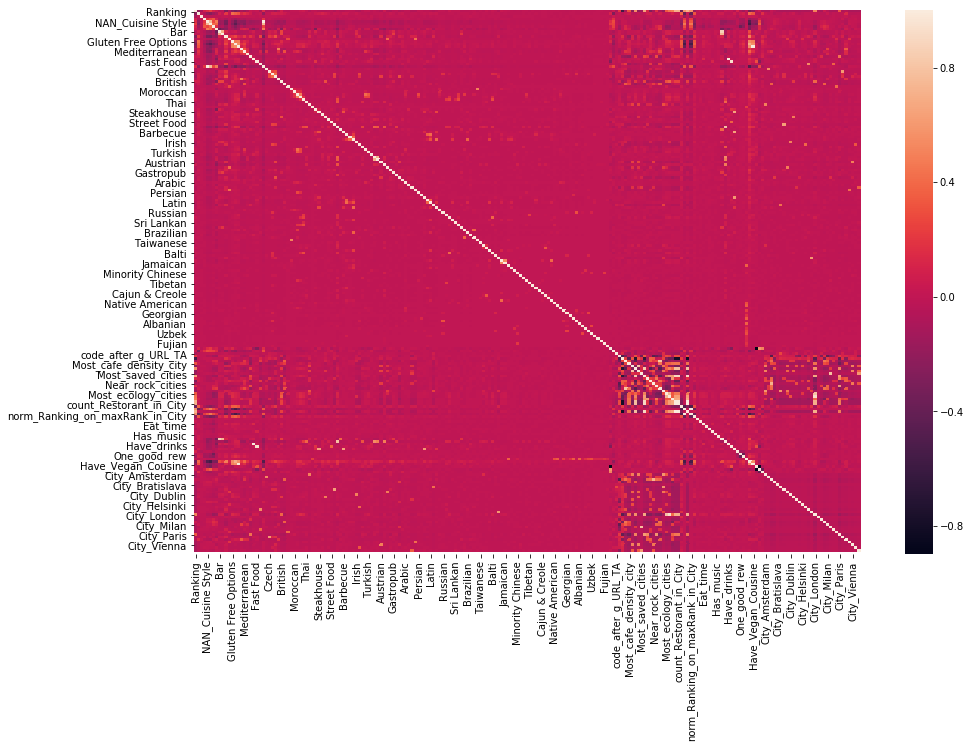

In [56]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [57]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0


In [58]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id'], axis = 1, inplace=True)
   
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['NAN_Number_of_Reviews_is'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    #Так как медиана и мода меньше среднего, то распределение признака положительное
    #Имеются выбросы
    #Следовательно заменим пропуски медианным значением
    median_Numb_Reviews = df_output['Number of Reviews'].median()
    df_output['Number of Reviews'].fillna(median_Numb_Reviews, inplace=True)
    # Рассмотрим признак - вид кухни
    df_output['NAN_Cuisine Style'] = pd.isna(df_output['Cuisine Style']).astype('float64') 
    # заполним пропуски значением 'Other'
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna("['Other']")
    #Заполним пропуски для Price Range
    # Создам новый признак - пропуски в ценах
    df_output['NAN_Price Range'] = pd.isna(df_output['Price Range']).astype('float64') 
    #Посмотрим и создадим признак пропуски в отзывах:
    df_output['NAN_Reviews'] = (df_output['Reviews']=='[[], []]').astype('float64')

    #Заменю все пропущенные значения наиболее часто встречающимся - модой
    df_output['Price Range'].fillna('$$ - $$$', inplace=True) 

    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    #df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # 
    le = LabelEncoder()
    le.fit(df_output['Cuisine Style'])
    df_output['code_Cuisine Style'] = le.transform(df_output['Cuisine Style'])

    # проведем обработку значений переменной
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.findall(r"'(\b.*?\b)'") 

    temp_list = df_output['Cuisine Style'].tolist()

    def list_unrar(list_of_lists):
        result=[]
        for lst in list_of_lists:
            result.extend(lst)
        return result

    temp_counter=Counter(list_unrar(temp_list))
    #Сделаем get_dummies для кухонь
    for cuisine in temp_counter:
        df_output[cuisine] = df_output['Cuisine Style'].apply(lambda x: 1 if cuisine in x else 0 ).astype('float64')
    
    # ################### 4. Feature Engineering ####################################################
    # 
    #Используемые в ходе работы функции

    #Функция - быстрая сводка статистических данных по признаку.
    def show_statistics(df_analyze):
        flag = 0;
        stat_data = []
        IQR = df_analyze.quantile(0.75,interpolation = 'midpoint') - df_analyze.quantile(0.25,interpolation = 'midpoint')
        perc25 = df_analyze.quantile(0.25)
        perc75 = df_analyze.quantile(0.75)
        min_range = df_analyze.quantile(0.25,interpolation = 'midpoint') - 1.5*IQR
        max_range = df_analyze.quantile(0.75,interpolation = 'midpoint') + 1.5*IQR
        for i in df_analyze:
            if (i < min_range)or(i > max_range):
                flag+=1
        if (flag > 0 ):
            print('Имеются выбросы в кол-ве: ', flag)
        else:
            print('Выбросов нет!')
        mean_df = df_analyze.mean()
        median_df = df_analyze.median()
        std_df = df_analyze.std()
        sweep = df_analyze.max() - df_analyze.min()
        #Добавляем найденные данные в список статистических данных (тааавталогия))
        stat_data.append(mean_df)
        stat_data.append(median_df)
        stat_data.append(std_df)
        stat_data.append(IQR)
        stat_data.append(sweep)
        stat_data.append(perc25)
        stat_data.append(perc75)
        print('Полученные статистические данные(в скобках - индекс значения в возвращаемом массиве): '
            '\n Среднее[0]:',round(mean_df,7), '\n Медиана[1]:',median_df, '\n СКО[2]:',round(std_df,7)
              ,'\n Межквартильный размах-IQR[3]',IQR,'\n Размах[4]',sweep, '\n 25% перцентиль[5]:',perc25
              ,'\n 75% перцентиль[6]:',perc75,"\n Границы выбросов: [{f}, {l}].".format(f = min_range, l = max_range))
        return stat_data

    #Функция первичного осмоттра столбцов
    def columns_info(col_value):
        if data[col_value].dtype == object:
            indexes = list(data[col_value].value_counts().index)
            print(data[col_value].value_counts())
            print('Уникальных значений:',data[col_value].nunique())
            print('Пропущенных значений в столбце:',data[col_value].isnull().sum(axis = 0))
        else:
            fig,ax = plt.subplots()
            data[col_value].hist(ax=ax)
            data[col_value].describe
            ax.set_xlabel(col_value)
            plt.show
            show_statistics(data[col_value])
            print('Пропущенных значений в столбце:',data[col_value].isnull().sum(axis = 0))

#############################Для признака City############################
    
    
    # #Функция проверяет в столице ли находится ресторан
    not_capital = ['Barcelona','Milan','Hamburg','Munich','Lyon','Zurich','Oporto',
              'Geneva','Krakow']
    def is_capital(city):
        if city in not_capital:
            x = 0
        else:
            x = 1
        return x
    
    #Функция выбирает города входящие в 5-ку наиболее гостепреимных стран
    most_hospitable = ['Dublin','Lisbon','Oporto','Edinburgh','Athens','Madrid','Barcelona',
                  'Milan']
    def is_most_hospitable(city):
        if city in most_hospitable:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города лидирующие в списке стран по количеству кафе,ресторанов
    #и баров на человека
    most_cafe_density = ['Madrid','Milan','Barcelona','Rome','Brussel','Amsterdam','Berlin',
                  'London']
    def is_cafe_density(city):
        if city in most_cafe_density:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города лидирующие в списке стран по уровню жизни
    best_level_of_living = ['Copenhagen','Zurich','Geneva','Helsinki','Amsterdam',
                  'Vienna']
    def is_level_of_living(city):
        if city in best_level_of_living:
            x = 1
        else:
            x = 0
        return x

    #Функция проверяет является ли город одним из наиболее часто посещаемых в Европе
    most_visited = ['Barcelona','Milan','Prague','Amsterdam','Paris','Rome','London']
    def is_most_visited(city):
        if city in most_visited:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает наиболее красивые города европы
    most_beatiful = ['Prague','Barcelona','Budapest','Amsterdam','Rome',
                  'Paris']
    def is_most_beatiful(city):
        if city in most_beatiful:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города входящие в Clobal Power City Index 2008-2017
    GPCI = ['London','Paris']
    def is_GPCI(city):
        if city in GPCI:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, считающиеся наиболее безопасными
    most_saved = ['Munich','Zurich']
    def is_most_saved(city):
        if city in most_saved:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, считающиеся наиболее дорогими для жизни
    most_expensive = ['Edinburgh','Vienna', 'Zurich','Copenhagen','Amsterdam']
    def is_most_expensive(city):
        if city in most_expensive:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, считающиеся лучшими для обучения
    #иностранных студентов
    most_educateable = ['Paris','Berlin', 'London','Munich']
    def is_most_educateable(city):
        if city in most_educateable:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, близкие к морю или заливу
    near_sea = ['Barcelona','Rome', 'Lisbon','Amsterdam', 'Stockholm', 'Dublin',
               'Copenhagen', 'Athens', 'Edinburgh', 'Oporto', 'Oslo', 'Helsinki']
    def is_near_sea(city):
        if city in near_sea:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города, близкие к горам
    near_rock = ['Barcelona','Vienna', 'Zurich','Geneva',]
    def is_near_rock(city):
        if city in near_rock:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города,c плотностью населения больше 7 млн./км^2
    most_populated_city_per_km2 = ['Barcelona','Paris', 'Lyon','Athens','Milan']
    def is_most_populated_city_per_km2(city):
        if city in most_populated_city_per_km2:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города,с наиболее теплым климатом
    most_hot_cities = ['Barcelona','Madrid', 'Rome','Athens','Milan',
                                  'Lisbon', 'Oporto']
    def is_most_hot_cities(city):
        if city in most_hot_cities:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает наиболее дождливые города Европы
    most_rainy_cities = ['Amsterdam','Brussels', 'Copenhagen','Ljubljana']
    def is_most_rainy_cities(city):
        if city in most_rainy_cities:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города Европы с наилучшей экологией
    most_ecology_cities = ['Oslo','Helsinki', 'Copenhagen','London','Amsterdam']
    def is_most_ecology_cities(city):
        if city in most_ecology_cities:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города из стран где английский язык - официальный
    english_official = ['Dublin','London']
    def is_english_official(city):
        if city in english_official:
            x = 1
        else:
            x = 0
        return x
    
    #Города входящие в топ-10  Европы по количеству населения
    most_poopulated = ['London','Berlin','Madrid','Rome','Paris']
    def is_populated(city):
        if city in most_poopulated:
            x = 0
        else:
            x = 1
        return x
    
    #Функция выбирает города наиболее привлекательные для молодежи
    better_for_young = ['Amsterdam','Rome','Budapesht',
                          'Brussel', 'Paris']
    def is_better_for_young(city):
        if city in better_for_young:
            x = 1
        else:
            x = 0
        return x

    #Функция выбирает города со средним возрастом населения менее 40 лет на 2018 год
    mid_young = ['Luxembourg','Oslo']
    def is_mid_young(city):
        if city in mid_young:
            x = 1
        else:
            x = 0
        return x
    
    
#############################Для признака Reviews############################    
   
    
    #Функция проверяет наличие хорошей кухни в ресторане
    good_cousine = ['good','delicious', 'nice', 'best', 'amazing', 'excellent', 'great',\
            'lovely', 'healthy', 'brilliant', 'fantastic', 'tasty', 'fresh',\
            'incredible', 'fabulous', 'perfect', 'cool', 'awesome', 'super', \
            'wonderful', 'yummy','unique','wonderful','fine','best','top','favorite']
    
    bad_cousine = ['worth','bad', 'poor', 'terrible', 'slow', 'worst','disappointing', 'overpriced', 'awful',\
            'rude','horrible', 'too']
    def check_is_good_cousine(reviews):
        x_1 = 0
        x_2 = 0
        x_3 = 0
        two_good = 0
        one_good = 0
        no_good = 0
        if len(reviews) > 0:
            words_1 = reviews[0][1:-1].split(' ')
        else:
            words_1 = ''
        if len(reviews) > 1:
            words_2 = reviews[1][1:-1].split(' ')
        else: 
            words_2 = ''
        for word in words_1:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in good_cousine:
                x_1 = 1
            if word.lower() in bad_cousine:
                x_3 = 1
        for word in words_2:
            word = re.sub("[^A-Za-z]", "", word)
            #print(word)
            if word.lower() in good_cousine:
                x_2 = 1
            if word.lower() in bad_cousine:
                x_3 = 1
        if (x_1>0)and(x_2>0):
            two_good = 1
        elif(x_1>0)or(x_2>0):
            one_good = 1
        elif(x_3>0):
            no_good = 1
        return [no_good,one_good,two_good]
    
    #Функция проверяет наличие хорошей атмосферы в ресторане
    good_atmosphere = [ 'awesome', 'cosy', 'beatiful', 'charming', 'cute', 'authentic',
                      'comfortable','wi-fi']
    def check_is_good_atmosphere(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in good_atmosphere:
                    x =1
        return x
    
    #Функция проверяет является ли он приотельным
    is_hotel = ['hotel', 'motel', 'room', 'inn','guesthouse','accommodation'
               ,'sanatorium','spa','stay','residential']
    def check_is_hotel(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in is_hotel:
                    x =1
        return x
    
    #Функция проверяет есть ли возможность взять еду на вынос
    take_away = ['take', 'away', 'go','out','outside','takeaway']
    def check_is_take_away(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in take_away:
                    x =1
        return x

    
    #Функция проверяет имеются ли стандартные предложения
    have_standard = ['breakfast', 'lunch', 'dinner','supper', 'coffee','tea']
    def check_is_have_standard(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in have_standard:
                    x =1
        return x

    #Функция проверяет быстроту приготовления пищи
    is_fast = ['fast','quick']
    def check_is_fast(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in is_fast:
                    x =1
        return x

    with_kids = ['kid', 'kids', 'son','daughter', 'children','child',
                'sons','daughters','birthday', 'party']
    #Функция проверяет наличие в отзывах записей о детях
    def check_is_with_kids(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in with_kids:
                    x =1
        return x

    #Функция проверяет наличие музыки
    has_music = ['music']
    def check_has_music(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in has_music:
                    x =1
        return x

    #Функция проверяет наличие вида
    has_view = ['view','views']
    def check_has_view(reviews):
        x = 0
        for review in reviews:
            words = review[1:-1].split(' ')
            for word in words:
                word = re.sub("[^A-Za-z]", "", word)
                if word.lower() in has_view:
                    x =1
        return x
    
    
    
#############################Для признака Cousine Style############################
    
    
    
    drinks = ['coffee','cafe','tea']
    #Функция проверяет имеются ли кофе или чай
    def have_drinks(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in drinks:
                x = 1
        return x
    
    #Функция проверят ресторан на наличие вегатарианского меню
    def have_vegan(cuisine_list):
        all_cuisine = ''
        for cousine in list(cuisine_list):
            all_cuisine+=cousine
        if  "'Vegetarian Friendly'" in all_cuisine or 'Vegan Options' in all_cuisine:
            x = 1
        else:
            x = 0
        return x    
    
    is_fastfood = ['fastfood','streetfood']
    #Функция проверяет имеется ли Fusion кухня
    def have_fastfood(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in is_fastfood:
                x = 1
        return x

    #Функция проверяет имеется безглютеновая еда
    is_grill = ['grill','barbecue','steakhouse']
    def have_grill(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in is_grill:
                x = 1
        return x

    #Функция проверяет наличие алкоголя в меню
    have_wine = ['wine','bar','pub', 'winebar']
    def have_wine_bar(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in have_wine:
                x = 1
        return x

    have_asian = ['japanese','sushi','asian','korean','thai', 'chinese', 'vietnamese']
    #Функция проверяет имеется ли азиатска кухня
    def have_asian_cousine(cuisine_list):
        x = 0
        for word in cuisine_list:
            word = re.sub("[^A-Za-z]", "", word)
            if word.lower() in have_asian:
                x = 1
        return x
    

    #Функция заменяет элементы в колонке Price Range
    def get_dimmies_price(x):
        cheap = 0
        middle = 0
        expensive = 0
        if (str(x) == '$$ - $$$')or(pd.isnull(str(x))):
            cheap = 0
            middle = 1
            expensive = 0
        if (str(x) == '$'):
            cheap = 1
            middle =0
            expensive = 0
        if (str(x) == '$$$$'):
            cheap = 0
            middle = 0
            expensive = 1 
        return [cheap,middle,expensive]
    
    #Функция заменяет элементы в колонке Price Range $ - 1,$$ - $$$ - 2, $$$$ - 3
    def get_dimmies_price_kat(x):
            if (str(x) == '$$ - $$$'):
                x = 2
            if (str(x) == '$'):
                x = 1
            if (str(x) == '$$$$'):
                x = 3
            if (pd.isnull(str(x))):
                x = 2
            return x
    #На основе Price Range получим Price_Range_processed:
    # $ - 1, $$ - $$$ - 2, $$$$ - 3
    df_output['Price_Range_processed'] = df_output['Price Range'].apply(get_dimmies_price_kat)
    #Создадим категориальные признаки на основе Price Range
    df_output['Price Range'] = df_output['Price Range'].apply(get_dimmies_price)
    #Создам новые признаки по стоимости обслуживания:
    #дешево, средняя цена и дорого
    df_output['Price Range'] = df_output['Price Range'].apply(get_dimmies_price)
    df_output['cheap'] = df_output['Price Range'].apply(lambda x: x[0])
    df_output['middle'] = df_output['Price Range'].apply(lambda x: x[1])
    df_output['expensive'] = df_output['Price Range'].apply(lambda x: x[2])
    
    #Создадим новые признаки - средний рейтинг ресторанов в городе
    #и количество ресторанов в городе
    mean_Ranking_on_City = df_output.groupby(['City'])['Ranking'].mean()
    count_Restorant_in_City = df_output['City'].value_counts(ascending=False)
    df_output['mean_Ranking_in_City'] = df_output['City'].apply(lambda x: mean_Ranking_on_City[x])
    df_output['count_Restorant_in_City'] = df_output['City'].apply(lambda x: count_Restorant_in_City[x])
    #А также - рестораны, входящие в топ 500 лучших по рейтингу
    df_output['Most_ranking'] = df_output.Ranking.apply(lambda x: 1 if x < 500 else 0)

    #Посмотрим на отзывы 
    df_output['rew_dates'] = df_output.Reviews.apply(lambda x: [0] if
                                            pd.isna(x) else x[2:-2].split('], [')[1][1:-1].split(","))
    #Наиболее свежие отзывы
    df_output['last_rew'] = pd.to_datetime(df_output['rew_dates'].apply(lambda x: max(x)))
    #Добавим новые признаки - даты первого и второго отзывов
    df_output['first_rew'] = pd.to_datetime(df_output['rew_dates'].apply(lambda x: x[0]))
    df_output['second_rew'] = pd.to_datetime(df_output['rew_dates'].apply(lambda x: x[1] if len(x) == 2 else ''))
    #Теперь найдем разницу в днях между представленными отзывами
    df_output['rew_delta'] = np.abs(df_output['first_rew']-df_output['second_rew'])
    df_output['Days_btwn_rew'] = df_output['rew_delta'].apply(lambda x: x.days)
    #Так как медиана и мода меньше среднего, то распределение признака положительное
    #Имеются выбросы
    #Следовательно заменим пропуски медианным значением
    median_rew_delta = df_output['Days_btwn_rew'].median()
    df_output['Days_btwn_rew'] = df_output['Days_btwn_rew'].fillna(median_rew_delta, inplace = True)
    #Добавим признак - актуальность отзыва (год последнего отзыва из представленных для каждого ресторана)
    df_output['Last_rew_year'] = df_output['last_rew'].apply(lambda x: x.year)
    #columns_info('Last_rew_year')
    #Так как медиана и мода меньше среднего, то распределение признака положительное
    #Имеются выбросы
    #Следовательно заменим пропуски медианным значением
    med_Last_rew_year = df_output['Last_rew_year'].median()
    df_output['Last_rew_year'] = df_output['Last_rew_year'].fillna(med_Last_rew_year, inplace = True)
    #Добавим новый признак - "совместная важность" отзывов. Если между отзывами
    #прошло больше 1.5 месяца они могут не отражать действительную картину
    need_days = timedelta(days=45)
    df_output['Important_reviews'] = df_output['rew_delta'].apply(lambda x: 1 if x<need_days else 0)
    #restaurants['Important reviews'].value_counts()
    
    
    # сформируем список достаточно уникальных кухонь и сформируем на его основе новый признак
    list_of_unique_Cuisine = [x[0] for x in temp_counter.most_common()[-16:]]
    df_output['unique_Cuisine_Style'] = df_output['Cuisine Style'].apply(lambda x: 1 if len(set(x) & set(list_of_unique_Cuisine))>0  else 0).astype('float64')
    #Добавим новый признак - количество кухонь для каждого ресторана
    df_output['Сousine_Сounts'] = df_output['Cuisine Style'].apply(lambda x: len(x))
    #А также признак наличия вегатарианского меню
    df_output['Have_Vegan_Cousine'] = df_output['Cuisine Style'].apply(have_vegan)
    
    #Углубимся в исследование признака города
    df_output['Is_Capital'] = df_output['City'].apply(is_capital)
    df_output['Most_poopulated_country'] = df_output['City'].apply(is_populated)
    df_output['Most_hospitable_country'] = df_output['City'].apply(is_most_hospitable)
    df_output['Most_cafe_density_city'] = df_output['City'].apply(is_cafe_density)
    df_output['Best_level_of_living_country'] = df_output['City'].apply(is_level_of_living)
    df_output['Most_educateable_cities'] = df_output['City'].apply(is_most_educateable)
    df_output['Most_expensive_cities'] = df_output['City'].apply(is_most_expensive)
    df_output['Most_saved_cities'] = df_output['City'].apply(is_most_saved)
    df_output['In_GPCI_country'] = df_output['City'].apply(is_GPCI)
    df_output['Most_beatiful_cities'] = df_output['City'].apply(is_most_beatiful)
    df_output['Near_sea_cities'] = df_output['City'].apply(is_near_sea)
    df_output['Near_rock_cities'] = df_output['City'].apply(is_near_rock)
    df_output['Most_populated_city_per_km2'] = df_output['City'].apply(is_most_populated_city_per_km2)
    df_output['Most_hot_cities'] = df_output['City'].apply(is_most_hot_cities)
    df_output['Most_rainy_cities'] = df_output['City'].apply(is_most_rainy_cities)
    df_output['Most_ecology_cities'] = df_output['City'].apply(is_most_ecology_cities)
    df_output['English_official'] = df_output['City'].apply(is_english_official)
    df_output['Most_visited_city'] = df_output['City'].apply(is_most_visited)
    
    #Рассмотрим детальнее сами отзывы:
    df_output['Review'] = df_output.Reviews.apply(lambda x: [0] if pd.isna(x) else x[2:-2].split('], [')[0])
    #Создадим признак - список из представленных отзывов
    df_output['Review'] = df_output['Review'].apply(lambda x: str(x).split(','))
    df_output['Is_hotel'] = df_output['Review'].apply(check_is_hotel) 
    df_output['Take_Away'] = df_output['Review'].apply(check_is_take_away) 
    df_output['Eat_time'] = df_output['Review'].apply(check_is_have_standard) 
    df_output['With_kids'] = df_output['Review'].apply(check_is_with_kids)
    df_output['Good_atmosphere'] = df_output['Review'].apply(check_is_good_atmosphere)
    df_output['Is_fast'] = df_output['Review'].apply(check_is_fast)
    df_output['Has_music'] = df_output['Review'].apply(check_has_music)
    df_output['Has_view'] = df_output['Review'].apply(check_has_view)
    
    #Углубимся в исследование признака Cuisine Style
    df_output['Have_wine'] = df_output['Cuisine Style'].apply(have_wine_bar)
    df_output['Have_Asian'] = df_output['Cuisine Style'].apply(have_asian_cousine)
    df_output['Have_drinks'] = df_output['Cuisine Style'].apply(have_drinks)
    df_output['Have_fastfood'] = df_output['Cuisine Style'].apply(have_fastfood)
    df_output['Have_Grill'] = df_output['Cuisine Style'].apply(have_grill)
    
    #Если в отзывах встречаются слова их списка, то скорее всего отзыв положительный
    df_output['Review'] = df_output['Review'].apply(check_is_good_cousine)
    #Создадим новые признаки:
    #оба отзывы скорее всего отрицательные
    df_output['Bad_review'] = df_output['Review'].apply(lambda x: x[0])
    #один из отзывов положительный
    df_output['One_good_rew'] = df_output['Review'].apply(lambda x: x[1])
    #оба отзыва положительные
    df_output['Both_good_rew'] = df_output['Review'].apply(lambda x: x[2])
    
    #Создадим признак ranking_proportion - отношение признака ranking и restaurants_count
    df_output['norm_Ranking_on_Rest_in_City'] = (df_output['Ranking'] - df_output['mean_Ranking_in_City']) / df_output['count_Restorant_in_City']
    max_Ranking_on_City = df_output.groupby(['City'])['Ranking'].max()
    df_output['max_Ranking_on_City'] = df_output['City'].apply(lambda x: max_Ranking_on_City[x])
    df_output['norm_Ranking_on_maxRank_in_City'] = (df_output['Ranking'] - df_output['mean_Ranking_in_City']) / df_output['max_Ranking_on_City']
    
    #Так как для Feature Engineering используется признак City
    #то get_dummies для него проведем в последнюю очередь
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies.
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    
    
    ########################ID_TA####################################
    
    df_output['code_ID_TA'] = df_output['ID_TA'].apply(lambda x: float(x[1:]))
    
    ########################URL_TA####################################
    
    df_output['code_after_g_URL_TA'] = df_output['URL_TA'].str.split('-').apply(lambda x: x[1][1:]).astype('float64')
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object", а также признаками с типами "datetime64" и "timedelta64" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object' or df_output[s].dtypes == 'datetime64[ns]' or df_output[s].dtypes == 'timedelta64[ns]']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    # функция для стандартизации
    def StandardScaler_column(d_col):
        scaler = StandardScaler()
        scaler.fit(df_output[[d_col]])
        return scaler.transform(df_output[[d_col]])
    # стандартизируем все столбцы кроме целевой и Sample
    for i  in list(df_output.columns):
        if i not in ['Rating','sample']:
            df_output[i] = StandardScaler_column(i)
            if len(df_output[df_output[i].isna()]) < len(df_output):
                df_output[i] = df_output[i].fillna(0)
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [59]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Number of Reviews,sample,Rating,NAN_Number_of_Reviews_is,NAN_Cuisine Style,NAN_Price Range,NAN_Reviews,code_Cuisine Style,Bar,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,code_ID_TA,code_after_g_URL_TA
5323,-0.121195,-0.405072,0,0.0,-0.261488,-0.549313,-0.729321,-0.440067,0.951927,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,1.421798,-0.142095
22284,-0.732807,-0.303469,1,4.5,-0.261488,-0.549313,-0.729321,-0.440067,-0.093180,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-0.108668,-0.156269
844,-0.293354,-0.282447,0,0.0,-0.261488,-0.549313,-0.729321,-0.440067,-0.393845,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-1.084471,-0.151142
11316,1.498240,-0.363029,1,4.0,-0.261488,1.820457,1.371138,-0.440067,0.865591,-0.298634,...,2.680669,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.533506,-0.152399
17405,-0.577674,-0.299965,1,5.0,3.824265,-0.549313,-0.729321,-0.440067,-0.076047,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,1.622077,-0.151242
13578,-0.027412,-0.166829,1,3.5,-0.261488,-0.549313,-0.729321,-0.440067,0.364369,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-0.672941,-0.147386
12926,-0.384704,-0.405072,1,4.5,-0.261488,1.820457,1.371138,2.272379,0.865591,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-0.935834,-0.138040
31369,-0.951182,0.022363,1,4.5,-0.261488,-0.549313,-0.729321,-0.440067,0.986865,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,1.029596,0.473260
31411,-0.975236,3.042438,1,4.5,-0.261488,-0.549313,-0.729321,-0.440067,1.263343,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.195885,-0.138040
29154,-0.659295,-0.408576,1,5.0,-0.261488,1.820457,1.371138,-0.440067,0.865591,-0.298634,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.189528,-0.156269


In [60]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 217 entries, Ranking to code_after_g_URL_TA
dtypes: float64(216), int64(1)
memory usage: 82.8 MB


In [61]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [62]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [63]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 216), (40000, 216), (40000, 215), (32000, 215), (8000, 215))

# Model 
Сам ML

In [64]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [65]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [66]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [67]:
# Видим разницу в том, что реальные рейтинги всегда кратны 0.5
# Напишем функцию соответствующей корректировки предсказанных рейтингов
# функция стандартного математического округления
def classic_round(d_num):
    return int(d_num + (0.5 if d_num > 0 else -0.5))

# функция округления кратно 0.5
def my_round(d_pred):
    result = classic_round(d_pred*2)/2
    if result <=5:
        return result
    else:
        return 5
    
# создание функции для векторов np
my_vec_round = np.vectorize(my_round)


In [68]:
y_pred_not_round = y_pred
y_pred = my_vec_round(y_pred)

In [69]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE_not_round:', metrics.mean_absolute_error(y_test, y_pred_not_round))
print('MAE_round:', metrics.mean_absolute_error(y_test, y_pred))

MAE_not_round: 0.200736875
MAE_round: 0.16875


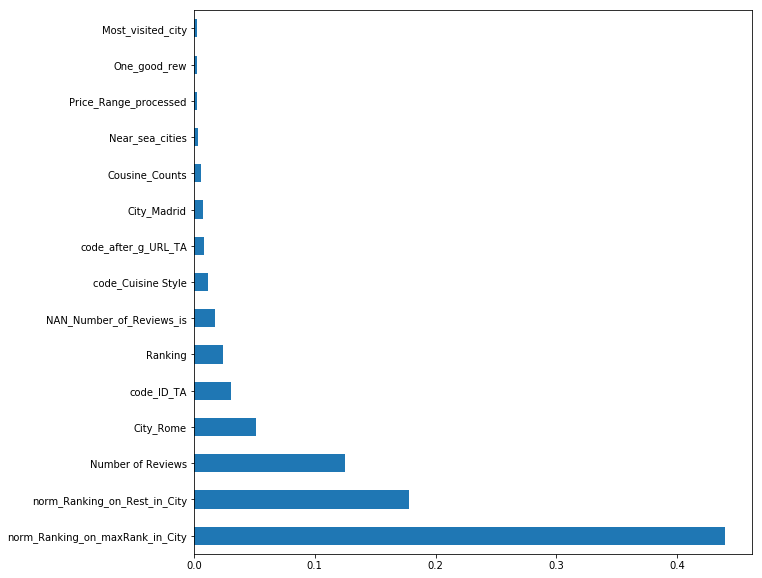

In [70]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [71]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,NAN_Number_of_Reviews_is,NAN_Cuisine Style,NAN_Price Range,NAN_Reviews,code_Cuisine Style,Bar,Pub,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,code_ID_TA,code_after_g_URL_TA
7213,0.281772,-0.324490,0.0,-0.261488,-0.549313,-0.729321,-0.440067,1.185741,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-0.549176,-0.149900
7952,2.663358,0.407755,0.0,-0.261488,-0.549313,-0.729321,-0.440067,-0.664948,3.348581,-0.255234,...,2.680669,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-0.681773,-0.152399
4049,-0.615512,0.495345,0.0,-0.261488,-0.549313,-0.729321,-0.440067,0.175907,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-1.250047,-0.158175
7765,-0.684700,-0.349015,0.0,-0.261488,-0.549313,-0.729321,-0.440067,-1.372101,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.948032,-0.156269
5670,-0.773347,0.877233,0.0,-0.261488,-0.549313,-0.729321,-0.440067,-1.218240,-0.298634,-0.255234,...,2.680669,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-1.397451,-0.152399
924,-0.189842,0.088931,0.0,-0.261488,-0.549313,-0.729321,-0.440067,0.298861,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.558760,-0.158175
7828,0.498526,-0.398065,0.0,-0.261488,-0.549313,1.371138,-0.440067,0.568620,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,-0.621047,-0.151142
6593,-0.862535,-0.313979,0.0,-0.261488,-0.549313,-0.729321,-0.440067,0.204126,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.219327,0.473260
379,-0.614431,-0.384051,0.0,-0.261488,-0.549313,-0.729321,-0.440067,-0.132821,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.826279,-0.151242
7235,-0.140924,-0.401568,0.0,-0.261488,1.820457,1.371138,2.272379,0.865591,-0.298634,-0.255234,...,-0.373041,-0.194136,-0.233683,-0.145244,-0.172388,-0.137291,-0.117857,0.0,0.840895,-0.151142


In [72]:
test_data = test_data.drop(['Rating'], axis=1)

In [73]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [74]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [75]:
predict_submission = my_vec_round(predict_submission)

In [76]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.0
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
